# "Can you predict COVID deaths by food habits?"

In [1]:
# Dependencies
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import requests

# Objective
### We want to analyse the data to see if healthy diet plays a factor in low death rate due to COVID-19

In [2]:
# File Path
diet_data_file = "datasets_618335_1395643_Food_Supply_Quantity_kg_Data.csv"

# Read CSV
diet_data = pd.read_csv(diet_data_file)

# Show Data
diet_data

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.094302,0.003298,0.065531,0.025473,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.194468,0.005849,0.106342,0.082276,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.070936,0.002775,0.048288,0.019873,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.003687,0.000169,0.001418,0.002100,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.092857,0.003061,0.068367,0.021429,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela,2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.070539,0.000607,0.039811,0.030120,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.000645,0.000006,0.000388,0.000252,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.005814,0.001666,0.002890,0.001257,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.034525,0.000925,0.024440,0.009160,18384000.0,%


In [3]:
list(diet_data.columns)

['Country',
 'Alcoholic Beverages',
 'Animal fats',
 'Animal Products',
 'Aquatic Products, Other',
 'Cereals - Excluding Beer',
 'Eggs',
 'Fish, Seafood',
 'Fruits - Excluding Wine',
 'Meat',
 'Milk - Excluding Butter',
 'Miscellaneous',
 'Offals',
 'Oilcrops',
 'Pulses',
 'Spices',
 'Starchy Roots',
 'Stimulants',
 'Sugar & Sweeteners',
 'Sugar Crops',
 'Treenuts',
 'Vegetable Oils',
 'Vegetables',
 'Vegetal Products',
 'Obesity',
 'Undernourished',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Population',
 'Unit (all except Population)']

## Use Required Columns

In [4]:
diet_data_subset =diet_data[["Country","Alcoholic Beverages","Animal Products", "Animal fats", "Vegetable Oils","Sugar & Sweeteners",
  "Cereals - Excluding Beer",
  "Vegetables",
  "Obesity", "Population"]]

diet_data_subset

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population
0,Afghanistan,0.0014,9.4341,0.1973,0.5345,1.3489,24.8097,6.7642,4.5,38928000.0
1,Albania,1.6719,18.7684,0.1357,0.3261,1.5367,5.7817,11.7753,22.3,2838000.0
2,Algeria,0.2711,9.6334,0.0282,1.0310,1.8342,13.6816,11.6484,26.6,44357000.0
3,Angola,5.8087,4.9278,0.0560,0.6463,1.8495,9.1085,2.3041,6.8,32522000.0
4,Antigua and Barbuda,3.5764,16.6613,0.0087,0.8102,3.8749,5.9960,5.4495,19.1,98000.0
...,...,...,...,...,...,...,...,...,...,...
165,Venezuela,2.5952,14.7565,0.0403,1.3734,3.4106,12.9253,4.1474,25.2,28645000.0
166,Vietnam,1.4591,8.5765,0.1640,0.2201,1.2846,16.8740,11.9508,2.1,96209000.0
167,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,3.2135,14.1,29826000.0
168,Zambia,5.7360,6.0197,0.0829,0.6657,1.5632,21.1938,3.4649,6.5,18384000.0


In [5]:
diet_data_subset=diet_data_subset.fillna(0)
diet_data_subset

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population
0,Afghanistan,0.0014,9.4341,0.1973,0.5345,1.3489,24.8097,6.7642,4.5,38928000.0
1,Albania,1.6719,18.7684,0.1357,0.3261,1.5367,5.7817,11.7753,22.3,2838000.0
2,Algeria,0.2711,9.6334,0.0282,1.0310,1.8342,13.6816,11.6484,26.6,44357000.0
3,Angola,5.8087,4.9278,0.0560,0.6463,1.8495,9.1085,2.3041,6.8,32522000.0
4,Antigua and Barbuda,3.5764,16.6613,0.0087,0.8102,3.8749,5.9960,5.4495,19.1,98000.0
...,...,...,...,...,...,...,...,...,...,...
165,Venezuela,2.5952,14.7565,0.0403,1.3734,3.4106,12.9253,4.1474,25.2,28645000.0
166,Vietnam,1.4591,8.5765,0.1640,0.2201,1.2846,16.8740,11.9508,2.1,96209000.0
167,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,3.2135,14.1,29826000.0
168,Zambia,5.7360,6.0197,0.0829,0.6657,1.5632,21.1938,3.4649,6.5,18384000.0


## Analyze the data

In [6]:
diet_data_subset.describe()

,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02
mean,3.022971,12.181871,0.221064,0.851554,2.799115,11.800347,6.085912,18.377647,4.452364e+07
std,2.382243,5.852635,0.278304,0.445335,1.545951,5.824870,3.560148,9.862101,1.564182e+08
min,0.000000,1.739100,0.001000,0.091500,0.366600,3.401400,0.857000,0.000000,5.400000e+04
25%,0.895625,7.236850,0.040225,0.507700,1.721025,7.226850,3.616500,8.200000,2.816250e+06
50%,2.866150,12.097550,0.116850,0.774450,2.601650,10.142750,5.028100,20.700000,1.018150e+07
75%,4.710950,16.444125,0.253900,1.070900,3.782150,15.148950,7.801650,25.700000,3.271625e+07
max,15.370600,26.886500,1.355900,2.202600,9.725900,29.804500,19.299500,45.600000,1.402385e+09


## Calculate the STD  Error

In [7]:
diet_data_subset.sem(axis=0)

Alcoholic Beverages         1.827097e-01
Animal Products             4.488766e-01
Animal fats                 2.134498e-02
Vegetable Oils              3.415567e-02
Sugar & Sweeteners          1.185690e-01
Cereals - Excluding Beer    4.467471e-01
Vegetables                  2.730509e-01
Obesity                     7.563886e-01
Population                  1.199673e+07
dtype: float64

## Load the John Hopkins COVID Confirmed Data 

In [8]:
#Load CSV
confirmed_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed_global="time_series_covid19_confirmed_global.csv"
# Read CSV
#confirmed_global_df = pd.read_csv(confirmed_global)
confirmed_global_df=pd.read_csv(confirmed_cases_data_url)
# Show Data
confirmed_global_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,23281,23875,24471,25142,25575,26127,26779,27363,27919,28664
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1962,1976,1979,1983,1983,1987,1989,1994,1999,2003
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12381,12415,12523,12639,12709,12776,12836,12952,13112,13214


## Drop the columns  not required

In [9]:
confirmed_global_df=confirmed_global_df[['Country/Region','9/10/20']]
confirmed_global_df

,Country/Region,9/10/20
0,Afghanistan,38572
1,Albania,10860
2,Algeria,47488
3,Andorra,1301
4,Angola,3217
...,...,...
261,West Bank and Gaza,28664
262,Western Sahara,10
263,Yemen,2003
264,Zambia,13214


# Group by Country

In [10]:
confirmed_global_df=confirmed_global_df.groupby(['Country/Region']).sum().reset_index()
confirmed_global_df

,Country/Region,9/10/20
0,Afghanistan,38572
1,Albania,10860
2,Algeria,47488
3,Andorra,1301
4,Angola,3217
...,...,...
183,West Bank and Gaza,28664
184,Western Sahara,10
185,Yemen,2003
186,Zambia,13214


## Load the John Hopkins COVID Deaths Data 

In [11]:
#Load CSV

death_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

deaths_global="time_series_covid19_deaths_global.csv"
# Read CSV
#deaths_global_df = pd.read_csv(deaths_global)
deaths_global_df =pd.read_csv(death_cases_data_url)

# Show Data
deaths_global_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,290,296,301,306,312,316,319,321,322,324
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1518,1523,1529,1539,1549,1556,1562,1571,1581,1591
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,109,112,113,115,117,117,120,124,126,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,159,162,167,170,177,181,184,190,192,198
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,570,571,571,572,572,572,573,576,576,580
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,290,292,292,292,292,295,295,297,300,300


## Drop columns not required 

In [12]:
deaths_global_df=deaths_global_df[['Country/Region','9/10/20']]

## Group by Country 

In [13]:
deaths_global_df=deaths_global_df.groupby(['Country/Region']).sum().reset_index()
deaths_global_df

,Country/Region,9/10/20
0,Afghanistan,1420
1,Albania,324
2,Algeria,1591
3,Andorra,53
4,Angola,130
...,...,...
183,West Bank and Gaza,198
184,Western Sahara,1
185,Yemen,580
186,Zambia,300


## Merge both the John Hopkins Covid-19 DFs 

In [14]:
#Merge both dataframes
#covid_merged_df= confirmed_global_df.merge(deaths_global_df, on='Country/Region')
covid_merged_df=pd.merge(confirmed_global_df, deaths_global_df, on='Country/Region')
covid_merged_df

,Country/Region,9/10/20_x,9/10/20_y
0,Afghanistan,38572,1420
1,Albania,10860,324
2,Algeria,47488,1591
3,Andorra,1301,53
4,Angola,3217,130
...,...,...,...
183,West Bank and Gaza,28664,198
184,Western Sahara,10,1
185,Yemen,2003,580
186,Zambia,13214,300


## Rename columns appropriately

In [15]:
covid_merged_df=covid_merged_df.rename({'Country/Region':'Country', '9/10/20_x':'confirmed','9/10/20_y':'deaths'}, axis=1)

covid_merged_df

,Country,confirmed,deaths
0,Afghanistan,38572,1420
1,Albania,10860,324
2,Algeria,47488,1591
3,Andorra,1301,53
4,Angola,3217,130
...,...,...,...
183,West Bank and Gaza,28664,198
184,Western Sahara,10,1
185,Yemen,2003,580
186,Zambia,13214,300


## Merge the diet data with the COVID-19 data

In [16]:
diet_covid_merged=diet_data_subset.merge(covid_merged_df, on='Country')
diet_covid_merged

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths
0,Afghanistan,0.0014,9.4341,0.1973,0.5345,1.3489,24.8097,6.7642,4.5,38928000.0,38572,1420
1,Albania,1.6719,18.7684,0.1357,0.3261,1.5367,5.7817,11.7753,22.3,2838000.0,10860,324
2,Algeria,0.2711,9.6334,0.0282,1.0310,1.8342,13.6816,11.6484,26.6,44357000.0,47488,1591
3,Angola,5.8087,4.9278,0.0560,0.6463,1.8495,9.1085,2.3041,6.8,32522000.0,3217,130
4,Antigua and Barbuda,3.5764,16.6613,0.0087,0.8102,3.8749,5.9960,5.4495,19.1,98000.0,95,3
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Venezuela,2.5952,14.7565,0.0403,1.3734,3.4106,12.9253,4.1474,25.2,28645000.0,57823,460
155,Vietnam,1.4591,8.5765,0.1640,0.2201,1.2846,16.8740,11.9508,2.1,96209000.0,1059,35
156,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,3.2135,14.1,29826000.0,2003,580
157,Zambia,5.7360,6.0197,0.0829,0.6657,1.5632,21.1938,3.4649,6.5,18384000.0,13214,300


## Analyze

In [17]:
diet_covid_merged.describe()

,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02,1.590000e+02,159.000000
mean,3.095887,12.381153,0.226194,0.856703,2.857862,11.945598,6.082336,18.431447,4.667921e+07,1.725296e+05,5562.012579
std,2.393332,5.909881,0.284149,0.445926,1.554851,5.901412,3.515894,9.290591,1.614225e+08,7.111802e+05,20638.720489
min,0.000000,1.739100,0.001800,0.091500,0.366600,3.401400,0.857000,2.100000,5.400000e+04,1.700000e+01,0.000000
25%,0.979400,7.325150,0.040250,0.508800,1.735450,7.244600,3.624500,8.400000,3.321000e+06,2.730000e+03,48.500000
50%,3.080500,12.315600,0.118500,0.781600,2.616900,10.311200,5.054200,21.200000,1.050000e+07,1.321400e+04,297.000000
75%,4.734600,16.703950,0.254850,1.077200,3.846850,15.719850,7.741450,25.700000,3.349900e+07,7.833900e+04,1707.500000
max,15.370600,26.886500,1.355900,2.202600,9.725900,29.804500,19.299500,37.300000,1.402385e+09,6.396551e+06,191766.000000


In [18]:
diet_covid_merged.sem()

Alcoholic Beverages         1.898036e-01
Animal Products             4.686840e-01
Animal fats                 2.253448e-02
Vegetable Oils              3.536422e-02
Sugar & Sweeteners          1.233077e-01
Cereals - Excluding Beer    4.680124e-01
Vegetables                  2.788286e-01
Obesity                     7.367918e-01
Population                  1.280164e+07
confirmed                   5.640026e+04
deaths                      1.636757e+03
dtype: float64

## Calculate the Positive Rate 

In [19]:
diet_covid_merged["Positive Test Rate"] = (100 * \
    diet_covid_merged["confirmed"].astype(
        int) / diet_covid_merged["Population"].astype(int)).round(2)
diet_covid_merged

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths,Positive Test Rate
0,Afghanistan,0.0014,9.4341,0.1973,0.5345,1.3489,24.8097,6.7642,4.5,38928000.0,38572,1420,0.10
1,Albania,1.6719,18.7684,0.1357,0.3261,1.5367,5.7817,11.7753,22.3,2838000.0,10860,324,0.38
2,Algeria,0.2711,9.6334,0.0282,1.0310,1.8342,13.6816,11.6484,26.6,44357000.0,47488,1591,0.11
3,Angola,5.8087,4.9278,0.0560,0.6463,1.8495,9.1085,2.3041,6.8,32522000.0,3217,130,0.01
4,Antigua and Barbuda,3.5764,16.6613,0.0087,0.8102,3.8749,5.9960,5.4495,19.1,98000.0,95,3,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Venezuela,2.5952,14.7565,0.0403,1.3734,3.4106,12.9253,4.1474,25.2,28645000.0,57823,460,0.20
155,Vietnam,1.4591,8.5765,0.1640,0.2201,1.2846,16.8740,11.9508,2.1,96209000.0,1059,35,0.00
156,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,3.2135,14.1,29826000.0,2003,580,0.01
157,Zambia,5.7360,6.0197,0.0829,0.6657,1.5632,21.1938,3.4649,6.5,18384000.0,13214,300,0.07


## Calculate the Death Rate

In [20]:
diet_covid_merged["Death Rate"] = (100 * \
    diet_covid_merged["deaths"].astype(
        int) / diet_covid_merged["confirmed"].astype(int)).round(2)
diet_covid_merged.head(20)

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Afghanistan,0.0014,9.4341,0.1973,0.5345,1.3489,24.8097,6.7642,4.5,38928000.0,38572,1420,0.10,3.68
1,Albania,1.6719,18.7684,0.1357,0.3261,1.5367,5.7817,11.7753,22.3,2838000.0,10860,324,0.38,2.98
2,Algeria,0.2711,9.6334,0.0282,1.0310,1.8342,13.6816,11.6484,26.6,44357000.0,47488,1591,0.11,3.35
3,Angola,5.8087,4.9278,0.0560,0.6463,1.8495,9.1085,2.3041,6.8,32522000.0,3217,130,0.01,4.04
4,Antigua and Barbuda,3.5764,16.6613,0.0087,0.8102,3.8749,5.9960,5.4495,19.1,98000.0,95,3,0.10,3.16
5,Argentina,4.2672,19.3454,0.2234,0.9541,3.0536,8.4102,4.3503,28.5,45377000.0,524198,10907,1.16,2.08
6,Armenia,0.4014,13.5640,0.1833,0.4705,2.6579,7.2982,16.7019,20.9,2956000.0,45326,906,1.53,2.00
7,Australia,5.5436,21.4175,0.3143,1.2798,2.5364,5.4979,5.1406,30.4,25754000.0,26564,797,0.10,3.00
8,Austria,7.0215,19.5654,0.8555,0.8109,2.6094,6.2116,5.1098,21.9,8914000.0,31247,748,0.35,2.39
9,Azerbaijan,3.5969,11.6416,0.2544,0.2235,1.5523,13.0898,10.0755,19.9,10108000.0,37874,556,0.37,1.47


## Sort by Death Rate, let us see the top 20

In [21]:
diet_covid_merged=diet_covid_merged.sort_values(['Death Rate'], ascending=False).reset_index(drop=True)

highest_deaths_rate_data=diet_covid_merged.head(20)
highest_deaths_rate_data


,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,3.2135,14.1,29826000.0,2003,580,0.01,28.96
1,Italy,3.1892,19.0329,0.2834,1.4224,1.7175,8.5417,6.9463,22.9,60296000.0,283180,35587,0.47,12.57
2,United Kingdom,5.2632,18.8798,0.2754,0.7372,2.4383,6.5412,4.5851,29.5,67160000.0,360544,41697,0.54,11.57
3,Belgium,5.3730,17.7279,0.8559,0.5640,3.6514,6.6704,6.8161,24.5,11515000.0,90568,9917,0.79,10.95
4,Mexico,4.4105,15.1527,0.1672,0.6856,3.2266,11.4325,5.0713,28.4,127792000.0,652364,69649,0.51,10.68
5,Ecuador,3.2929,15.3469,0.1277,1.3777,1.7370,14.9132,2.4981,19.3,17511000.0,113206,10749,0.65,9.50
6,France,4.1631,21.7097,0.7907,0.8675,2.6110,6.9951,5.1223,23.2,64940000.0,392243,30819,0.60,7.86
7,Netherlands,4.3903,24.2977,0.3343,0.8485,2.3446,4.9685,3.2587,23.1,17467000.0,82016,6285,0.47,7.66
8,Chad,0.8297,12.2804,0.2023,0.4556,1.3449,21.6017,0.9141,4.8,16877000.0,1051,79,0.01,7.52
9,Sweden,4.4232,24.0627,1.0442,0.3967,2.5211,6.1923,4.6110,22.1,10377000.0,86194,5843,0.83,6.78


## Lowest Death rate 

In [22]:

lowest_deaths_rate_data=diet_covid_merged.tail(20)
lowest_deaths_rate_data

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
139,Nepal,0.3318,5.4355,0.0312,0.8209,0.5470,18.1511,9.2770,3.8,29996000.0,50465,317,0.17,0.63
140,Cote d'Ivoire,1.4487,2.9144,0.0132,0.8656,0.7859,11.4585,2.8098,9.0,26175000.0,18869,119,0.07,0.63
141,Ghana,0.9444,2.8956,0.0088,0.3655,0.8128,6.3230,1.6849,9.7,31073000.0,45313,283,0.15,0.62
142,Gabon,6.1881,8.1825,0.0109,0.4824,1.2508,9.1158,2.3979,13.4,2231000.0,8621,53,0.39,0.61
143,Kuwait,0.0044,10.7213,0.0022,1.1976,2.9163,11.4132,12.9953,37.0,4691000.0,92822,556,1.98,0.60
144,United Arab Emirates,0.0000,10.5491,0.1896,0.7949,3.6576,12.9060,8.2695,29.9,9778000.0,76911,398,0.79,0.52
145,Rwanda,1.3631,2.6366,0.0186,0.2109,0.5782,3.5380,2.7193,4.8,12952000.0,4479,22,0.03,0.49
146,Iceland,4.7545,23.9700,0.9461,0.4667,3.9472,4.1196,3.6874,23.1,368000.0,2157,10,0.59,0.46
147,Botswana,4.2717,14.4486,0.3402,1.0065,4.7857,11.4320,4.0558,16.1,2317000.0,2252,10,0.10,0.44
148,Sri Lanka,0.6810,5.5328,0.0147,0.2466,2.7209,20.7839,4.8753,5.4,21937000.0,3155,12,0.01,0.38


## Comparing some countries, looking for outliers

In [23]:
diet_covid_merged[diet_covid_merged['Country']== 'Yemen']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,3.2135,14.1,29826000.0,2003,580,0.01,28.96


In [24]:
diet_covid_merged[diet_covid_merged['Country']== 'Nepal']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
139,Nepal,0.3318,5.4355,0.0312,0.8209,0.547,18.1511,9.277,3.8,29996000.0,50465,317,0.17,0.63


In [25]:
diet_covid_merged[diet_covid_merged['Country']== 'Japan']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
89,Japan,4.044,15.3194,0.0751,1.3445,2.2055,12.1692,7.8669,4.4,125967000.0,73916,1416,0.06,1.92


In [26]:
diet_covid_merged[diet_covid_merged['Country']== 'US']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
48,US,4.8647,21.2352,0.1681,0.9889,3.32,5.5048,5.7249,37.3,329878000.0,6396551,191766,1.94,3.0


## Differences in Death Rate can be caused by:

#### Differences in the number of people tested: With more testing, more people with milder cases are identified. This lowers the Death Rate.
#### Demographics: For example, Mortality tends to be higher in older populations.
#### Characteristics of the healthcare system: For example, Mortality may rise as hospitals become overwhelmed and have fewer resources.
#### Other factors, many of which remain unknown.

In [27]:
used_column_names = [
    'Alcoholic Beverages',
    'Animal Products',
    'Animal fats',
    'Vegetable Oils',
    'Sugar & Sweeteners',
    'Cereals - Excluding Beer',
    'Vegetables',
    'Obesity',
    'Population'
]

## Computing the average for countries with Hightest/Lowest Death Rates

In [28]:
highest_deaths_rate_mean = {column_name:highest_deaths_rate_data[column_name].mean() for column_name in used_column_names[:-1]}
print('Average values for records with highest death rate: \n{}'.format(highest_deaths_rate_mean))

lowest_deaths_rate_mean = {column_name:lowest_deaths_rate_data[column_name].mean() for column_name in used_column_names[:-1]}
print('Average values for records with lowest death rate: \n{}'.format(lowest_deaths_rate_mean))

Average values for records with highest death rate: 
{'Alcoholic Beverages': 3.2885800000000005, 'Animal Products': 14.886789999999996, 'Animal fats': 0.39058499999999996, 'Vegetable Oils': 0.8832000000000001, 'Sugar & Sweeteners': 2.9389550000000004, 'Cereals - Excluding Beer': 11.63861, 'Vegetables': 5.345615, 'Obesity': 21.315000000000005}
Average values for records with lowest death rate: 
{'Alcoholic Beverages': 2.4058349999999997, 'Animal Products': 10.185869999999998, 'Animal fats': 0.12842499999999998, 'Vegetable Oils': 0.621915, 'Sugar & Sweeteners': 2.7809850000000003, 'Cereals - Excluding Beer': 11.606655, 'Vegetables': 5.218315000000001, 'Obesity': 15.285000000000002}


In [29]:
diet_covid_merged.to_csv('output2.csv', index = False, header = True)

# ML approach

In [30]:
diet_covid_merged.head(20)

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Yemen,0.0364,5.7874,0.0446,1.0811,5.0468,27.2077,3.2135,14.1,29826000.0,2003,580,0.01,28.96
1,Italy,3.1892,19.0329,0.2834,1.4224,1.7175,8.5417,6.9463,22.9,60296000.0,283180,35587,0.47,12.57
2,United Kingdom,5.2632,18.8798,0.2754,0.7372,2.4383,6.5412,4.5851,29.5,67160000.0,360544,41697,0.54,11.57
3,Belgium,5.3730,17.7279,0.8559,0.5640,3.6514,6.6704,6.8161,24.5,11515000.0,90568,9917,0.79,10.95
4,Mexico,4.4105,15.1527,0.1672,0.6856,3.2266,11.4325,5.0713,28.4,127792000.0,652364,69649,0.51,10.68
5,Ecuador,3.2929,15.3469,0.1277,1.3777,1.7370,14.9132,2.4981,19.3,17511000.0,113206,10749,0.65,9.50
6,France,4.1631,21.7097,0.7907,0.8675,2.6110,6.9951,5.1223,23.2,64940000.0,392243,30819,0.60,7.86
7,Netherlands,4.3903,24.2977,0.3343,0.8485,2.3446,4.9685,3.2587,23.1,17467000.0,82016,6285,0.47,7.66
8,Chad,0.8297,12.2804,0.2023,0.4556,1.3449,21.6017,0.9141,4.8,16877000.0,1051,79,0.01,7.52
9,Sweden,4.4232,24.0627,1.0442,0.3967,2.5211,6.1923,4.6110,22.1,10377000.0,86194,5843,0.83,6.78


### Check the corelational matrix

In [42]:
#Removing Yemen from the DF, could be an outlier
diet_covid_merged=diet_covid_merged.drop(diet_covid_merged.index[[0]])


diet_covid_merged.head(20)

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
1,Italy,3.1892,19.0329,0.2834,1.4224,1.7175,8.5417,6.9463,22.9,6.029600e+07,283180,35587,0.47,12.57
2,United Kingdom,5.2632,18.8798,0.2754,0.7372,2.4383,6.5412,4.5851,29.5,6.716000e+07,360544,41697,0.54,11.57
3,Belgium,5.3730,17.7279,0.8559,0.5640,3.6514,6.6704,6.8161,24.5,1.151500e+07,90568,9917,0.79,10.95
4,Mexico,4.4105,15.1527,0.1672,0.6856,3.2266,11.4325,5.0713,28.4,1.277920e+08,652364,69649,0.51,10.68
5,Ecuador,3.2929,15.3469,0.1277,1.3777,1.7370,14.9132,2.4981,19.3,1.751100e+07,113206,10749,0.65,9.50
6,France,4.1631,21.7097,0.7907,0.8675,2.6110,6.9951,5.1223,23.2,6.494000e+07,392243,30819,0.60,7.86
7,Netherlands,4.3903,24.2977,0.3343,0.8485,2.3446,4.9685,3.2587,23.1,1.746700e+07,82016,6285,0.47,7.66
8,Chad,0.8297,12.2804,0.2023,0.4556,1.3449,21.6017,0.9141,4.8,1.687700e+07,1051,79,0.01,7.52
9,Sweden,4.4232,24.0627,1.0442,0.3967,2.5211,6.1923,4.6110,22.1,1.037700e+07,86194,5843,0.83,6.78
10,Canada,4.8441,16.0365,0.8084,1.3441,5.0237,6.4236,5.4961,31.3,3.819000e+07,136956,9213,0.36,6.73


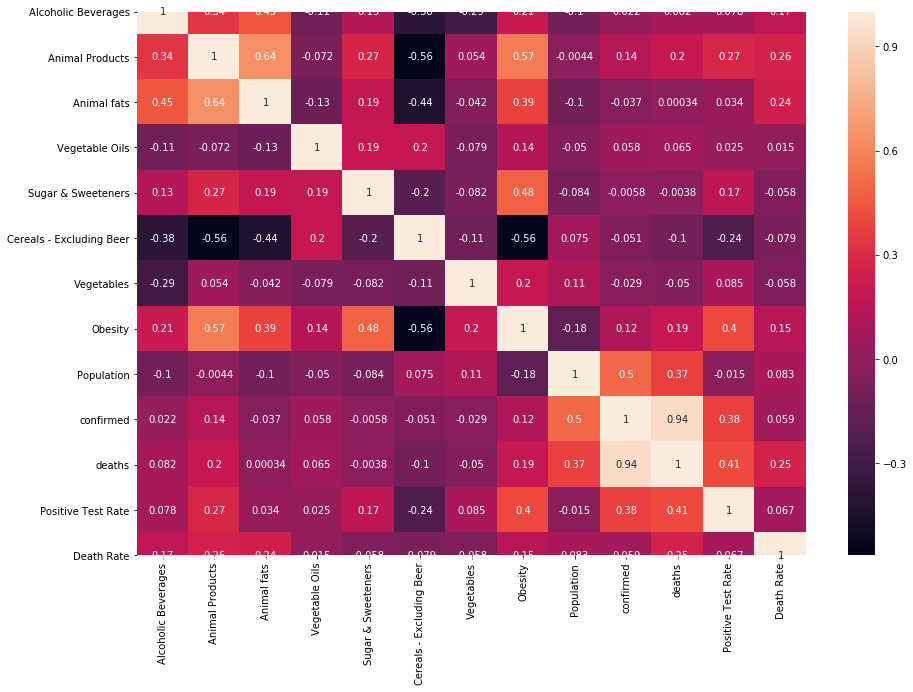

In [56]:
plt.figure(figsize=(15,10))
corr=diet_covid_merged.corr()
sns.heatmap(corr, annot= True) #Plot the correlation as heat map
plt.show()

### Looking at the above corelational matrix, we can see that Animal Fats, Animal Products, Obesity,  Alcoholic Beverages and vegetable oils correlate more with Death Rate. 

In [57]:
!pip install sklearn --upgrade
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")

Requirement already up-to-date: sklearn in c:\users\aguha\anaconda3\lib\site-packages (0.0)


Error processing line 7 of C:\Users\aguha\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\aguha\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [65]:
# Set features. This will also be used as your x values.
X = diet_covid_merged.drop(['deaths', 'Country', 'Population','Death Rate', 'confirmed','Positive Test Rate'], axis=1)

In [66]:
# Use Deaths for the y values
y=diet_covid_merged["Death Rate"]

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [68]:
X

,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetables,Obesity
1,3.1892,19.0329,0.2834,1.4224,1.7175,8.5417,6.9463,22.9
2,5.2632,18.8798,0.2754,0.7372,2.4383,6.5412,4.5851,29.5
3,5.3730,17.7279,0.8559,0.5640,3.6514,6.6704,6.8161,24.5
4,4.4105,15.1527,0.1672,0.6856,3.2266,11.4325,5.0713,28.4
5,3.2929,15.3469,0.1277,1.3777,1.7370,14.9132,2.4981,19.3
...,...,...,...,...,...,...,...,...
154,0.4459,5.4983,0.0897,0.6842,2.8203,26.3320,3.1867,2.9
155,4.5783,6.0800,0.0377,0.2511,2.9923,24.8906,3.0072,3.5
156,4.0867,14.0252,0.1735,1.3850,6.4623,6.3135,4.2090,23.1
157,7.8024,14.8893,0.0252,0.6103,3.7043,7.2091,4.1169,19.8


In [69]:
y

1      12.57
2      11.57
3      10.95
4      10.68
5       9.50
       ...  
154     0.00
155     0.00
156     0.00
157     0.00
158     0.00
Name: Death Rate, Length: 158, dtype: float64

## Random Forrest

In [50]:
from sklearn.ensemble import RandomForestRegressor

#Model
reg = RandomForestRegressor()

#Fit
reg.fit(X, y)


RandomForestRegressor()

In [51]:
#Score
reg.score(X, y)

0.8393637362211082

In [52]:
 [x for x in zip(reg.feature_importances_, X.columns)]

[(0.12735597548065225, 'Alcoholic Beverages'),
 (0.19380969963267358, 'Animal Products'),
 (0.15615108627638738, 'Animal fats'),
 (0.1232500737497693, 'Vegetable Oils'),
 (0.12179514630783388, 'Sugar & Sweeteners'),
 (0.08565485055248809, 'Cereals - Excluding Beer'),
 (0.10632053731101747, 'Vegetables'),
 (0.08566263068917813, 'Obesity')]

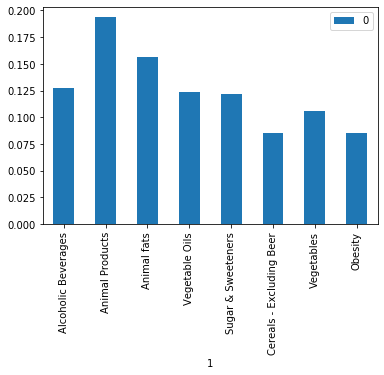

In [53]:
pd.DataFrame([x for x in zip(reg.feature_importances_, X.columns)]).plot(kind='bar', y=0, x=1)

### Looking at the feature importances, we can see that Animal Products, Animal fats, Vegetable Oils seem to have  a high importance in predicting Deaths 

In [54]:
my_df = pd.DataFrame({
    'Alcoholic Beverages':[2.5],
    'Animal Products':[42.5],
    'Animal fats':[22.5],
    'Vegetable Oils':[2.5],
    'Sugar & Sweeteners':[2.5],
    'Cereals - Excluding Beer':[2.5],
    'Vegetables':[2.5],
    'Obesity':[32.5]
})

In [55]:
reg.predict(my_df)

array([4.8599])